In [ ]:
! pip install geopandas
import geopandas
import requests
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import io
import math
import numpy as np

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')
%cd ../content/gdrive/My\ Drive/python\ files/NYC\ project

Mounted at /content/gdrive
/content/gdrive/My Drive/python files/NYC project


In [5]:
## ------------------------------READ SHAPEFILES--------------------------------
##------------------------------------------------------------------------------
#function that reads NYC shapefile (tracts for now)
def read_shapefile():
  #2010 Shapefiles downloaded from https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page 
  #tract shapefile 
  NYC_df = geopandas.read_file('./shapefiles/NYC/tracts/nyct2010.shp') 

  NYC_df['CT2010'] = NYC_df['CT2010'].astype(int)
  NYC_df['BoroCode'] = NYC_df['BoroCode'].astype(int)
  NYC_df['geoid'] = NYC_df['CT2010'] + 1000000*( 36061*(NYC_df['BoroCode']==1) + 36005*(NYC_df['BoroCode']==2) + 36047*(NYC_df['BoroCode']==3) + 36081*(NYC_df['BoroCode']==4) + 36085*(NYC_df['BoroCode']==5)) 
  NYC_df['geoid'] = NYC_df['geoid'].astype(str)
  return(NYC_df)

In [3]:
## ------------------------WORKPLACE LOCATIONS HEATMAP--------------------------
##------------------------------------------------------------------------------
NYC_dfw = read_shapefile()

NYC_wac = pd.read_csv('./data/ny_wac_S000_JT00_2017.csv',header='infer')
NYC_wac['geoid'] = NYC_wac['w_geocode']//10000

# collapse number of workers on tracts
NYC_wac['geoid'] = NYC_wac['geoid'].astype(int).astype(str)
NYC_wac = NYC_wac.groupby('geoid',as_index=False).mean()

# merge the shapefile map with LODES workplace counts file, at the tract level
NYC_dfw = NYC_dfw.merge(NYC_wac, how='inner', on= 'geoid')

#plot heatmap of workplace locations
ax1 = NYC_dfw.plot(color='white', edgecolor='black', figsize=(30, 15) )
NYC_dfw.plot(ax=ax1, column=np.log(NYC_dfw['C000']), cmap='Blues', figsize=(30, 15))
#plt.title('Spatial Distribution of Workers\' Workplace Locations', fontsize=20)
PCM=ax1.get_children()[1]
plt.colorbar(PCM, label='log( #of workers )')
plt.axis('off')
plt.savefig('./figures/LODES_workplaces_distribution_log.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
#plt.show()

#also save the map without taking log of counts
ax2 = NYC_dfw.plot(color='white', edgecolor='black', figsize=(30, 15) )
NYC_dfw.plot(ax=ax2, column=(NYC_dfw['C000']), cmap='Blues', figsize=(30, 15))
#plt.title('Spatial Distribution of Workers\' Workplace Locations', fontsize=20)
PCM=ax2.get_children()[1]
plt.colorbar(PCM, label='#of workers')
plt.axis('off')
plt.savefig('./figures/LODES_workplaces_distribution.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)

NameError: ignored

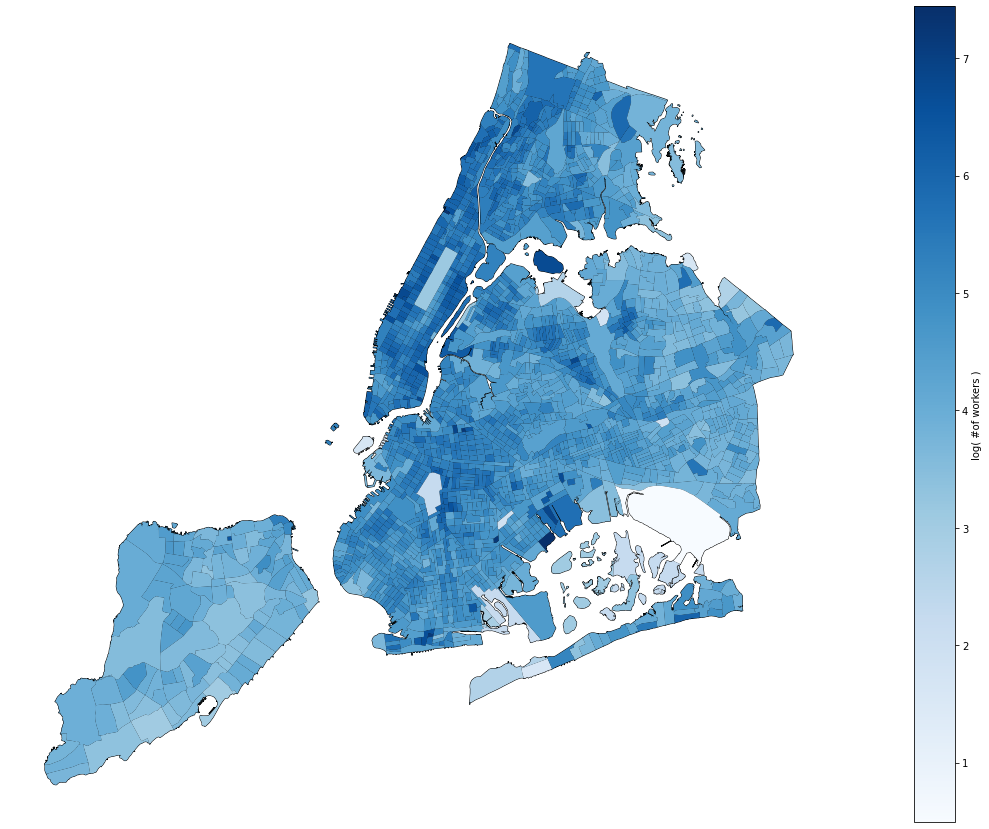

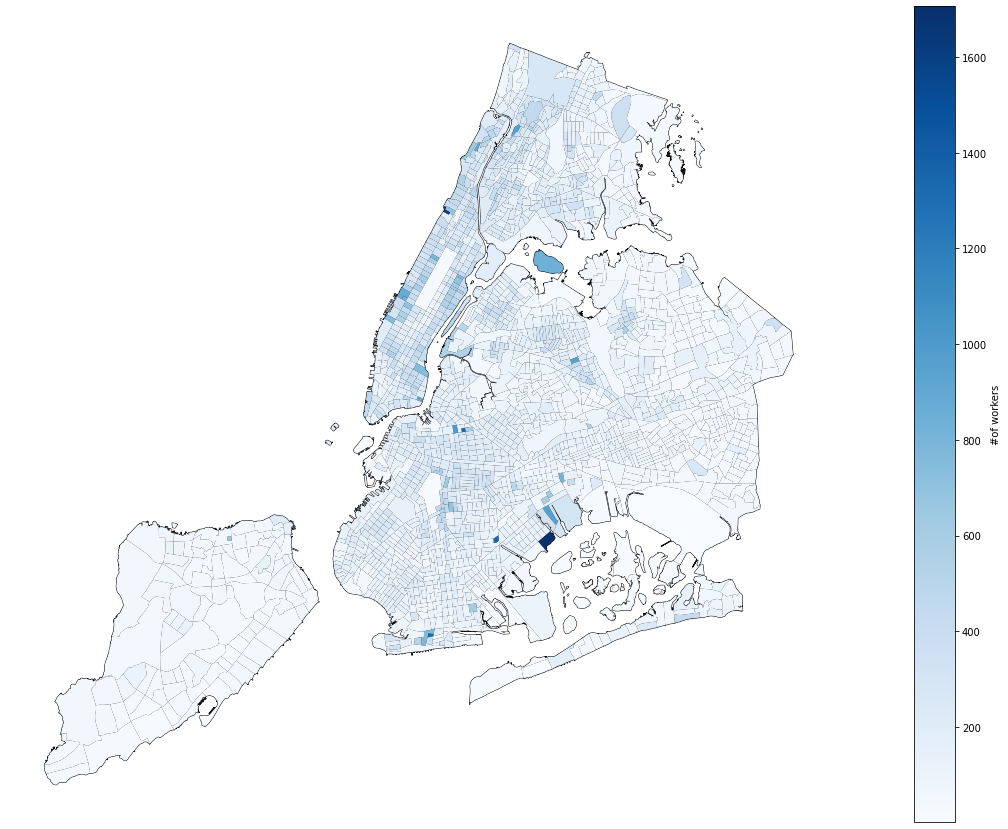

In [7]:
## ------------------------RESIDENCE LOCATIONS HEATMAP--------------------------
##------------------------------------------------------------------------------
NYC_dfr = read_shapefile()

NYC_rac = pd.read_csv('./data/ny_rac_S000_JT00_2017.csv',header='infer')
NYC_rac['geoid'] = NYC_rac['h_geocode']//10000

# collapse number of workers on tracts
NYC_rac['geoid'] = NYC_rac['geoid'].astype(int).astype(str)
NYC_rac = NYC_rac.groupby('geoid',as_index=False).mean()

# merge the shapefile map with LODES workplace counts file, at the tract level
NYC_dfr = NYC_dfr.merge(NYC_rac, how='inner', on= 'geoid')

#plot heatmap of workplace locations
ax1 = NYC_dfr.plot(color='white', edgecolor='black', figsize=(30, 15) )
NYC_dfr.plot(ax=ax1, column=np.log(NYC_dfr['C000']), cmap='Blues', figsize=(30, 15)  )
#plt.title('Spatial Distribution of Workers\' Residense Locations', fontsize=20)
PCM=ax1.get_children()[1]
plt.colorbar(PCM, label='log( #of workers )')
plt.axis('off')
plt.savefig('./figures/LODES_Residences_distribution_log.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
#plt.show()

#also save the map without taking log of counts
ax2 = NYC_dfr.plot(color='white', edgecolor='black', figsize=(30, 15) )
NYC_dfr.plot(ax=ax2, column=(NYC_dfr['C000']), cmap='Blues', figsize=(30, 15)  )
#plt.title('Spatial Distribution of Workers\' Residense Locations', fontsize=20)
PCM=ax2.get_children()[1]
plt.colorbar(PCM, label='#of workers')
plt.axis('off')
plt.savefig('./figures/LODES_Residences_distribution.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide b

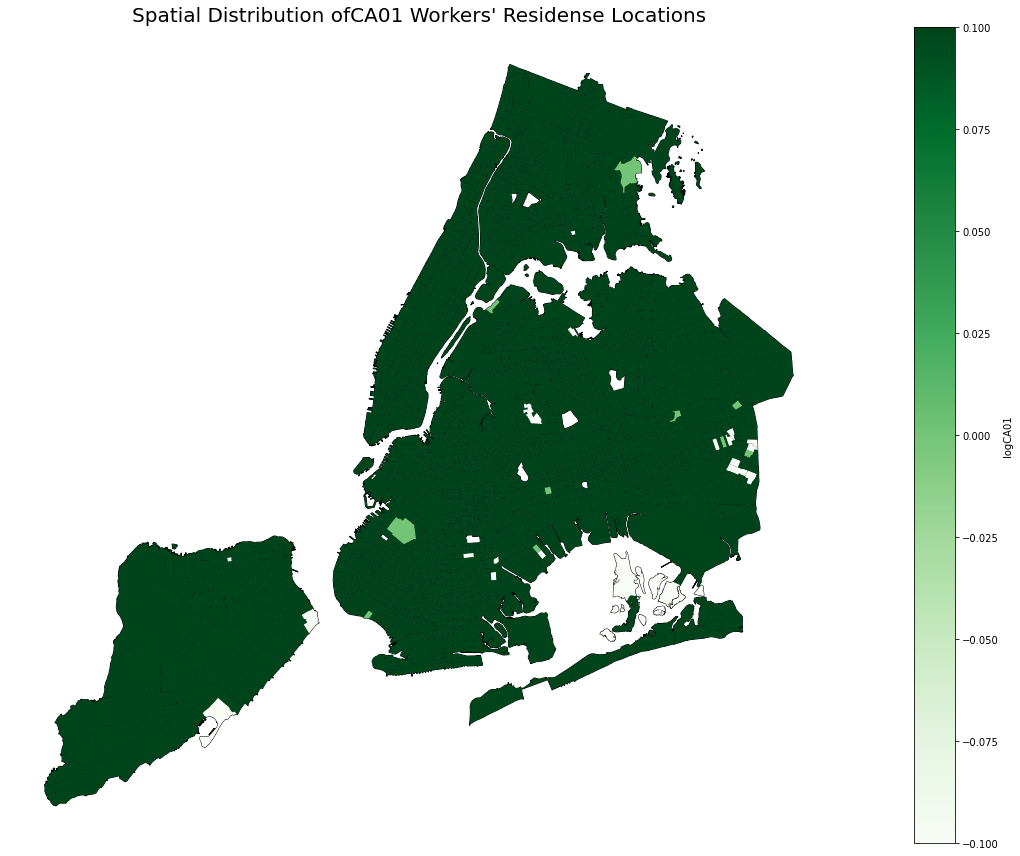

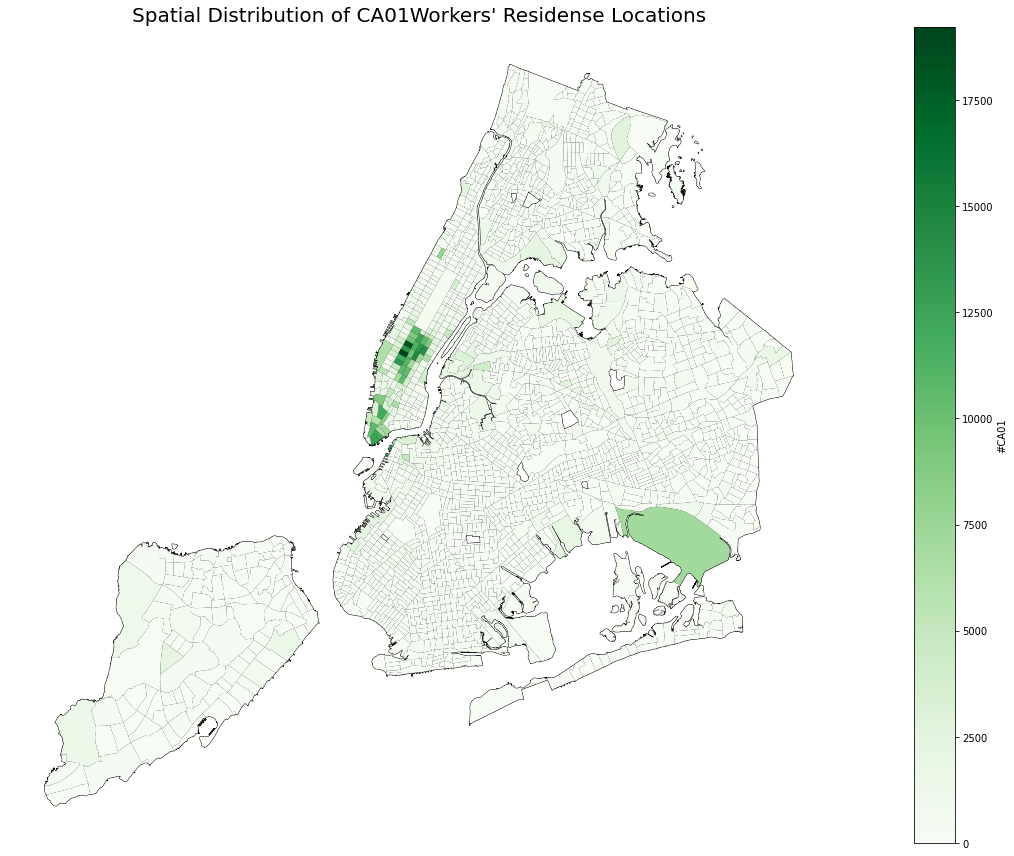

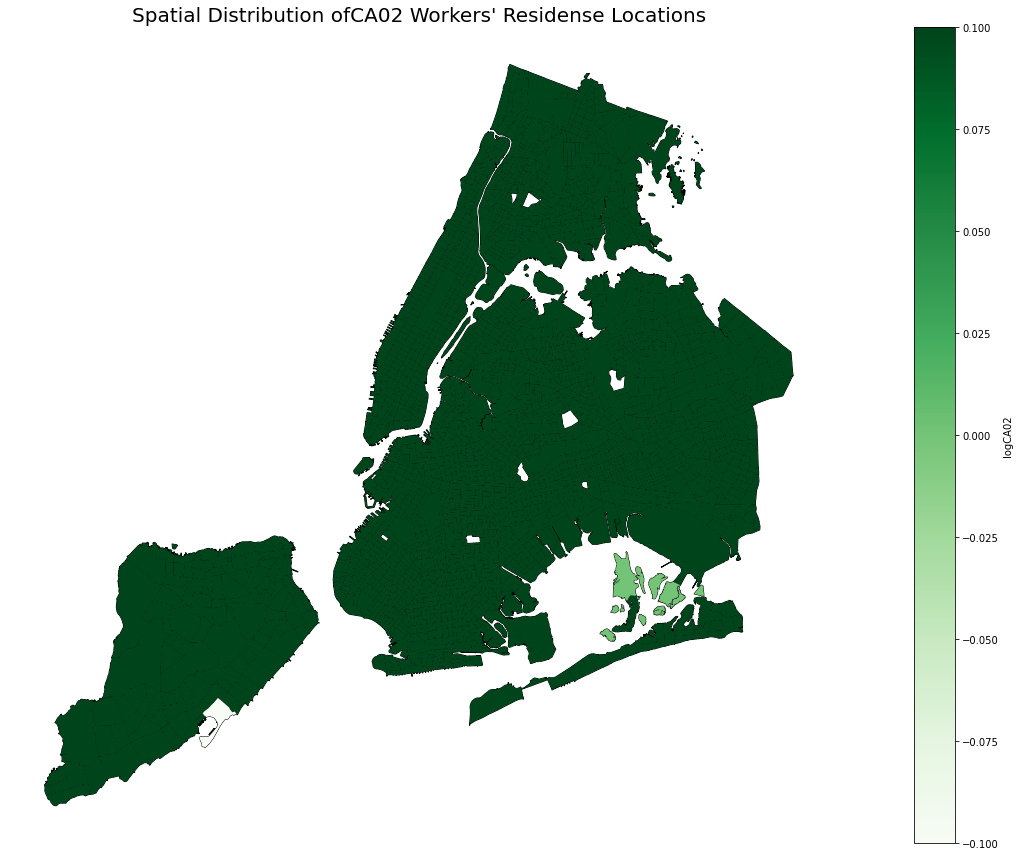

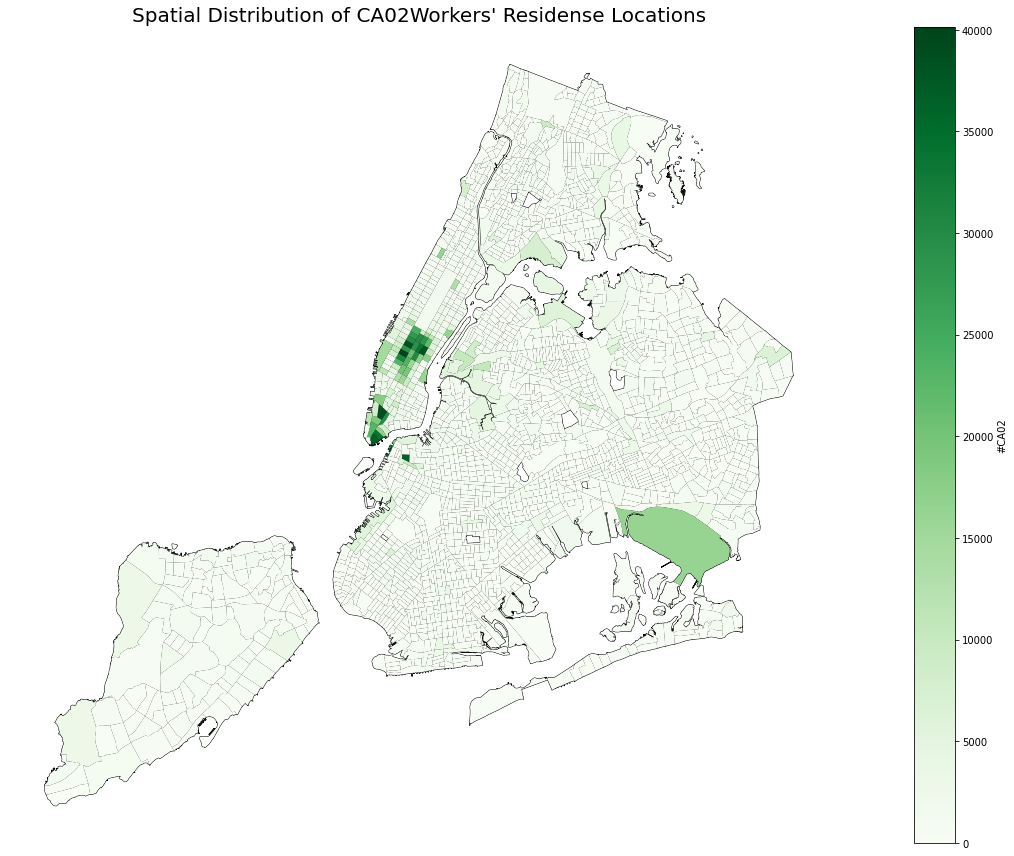

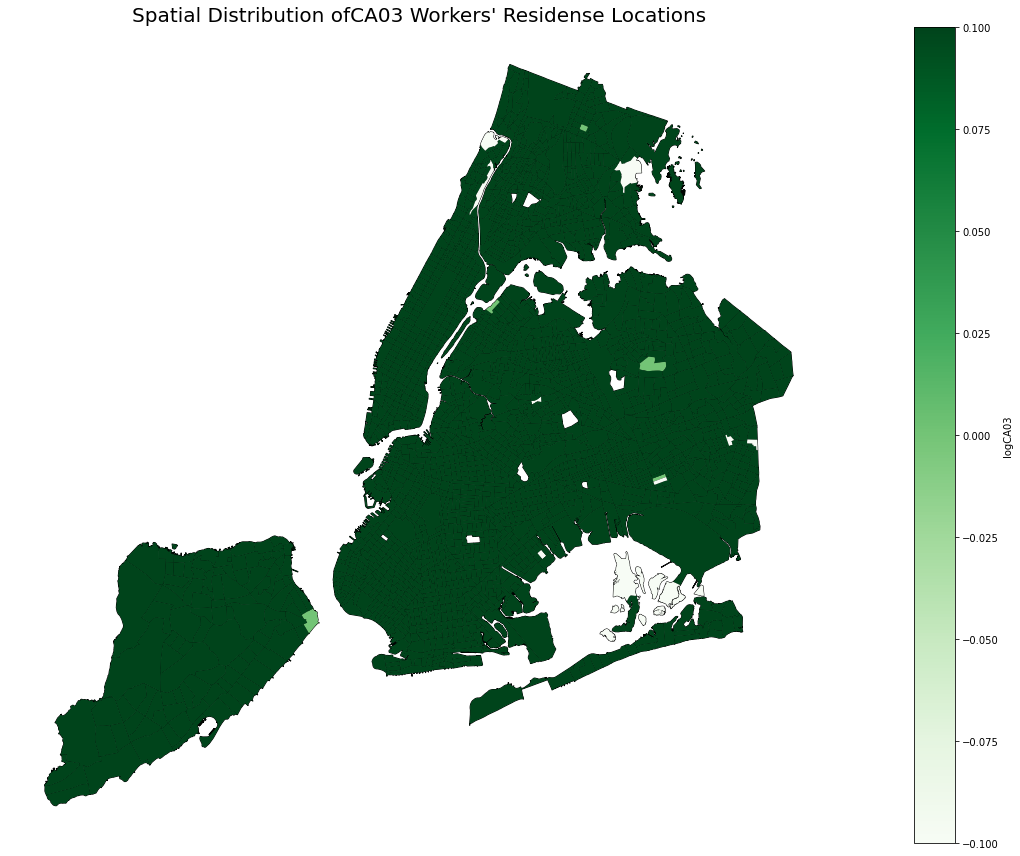

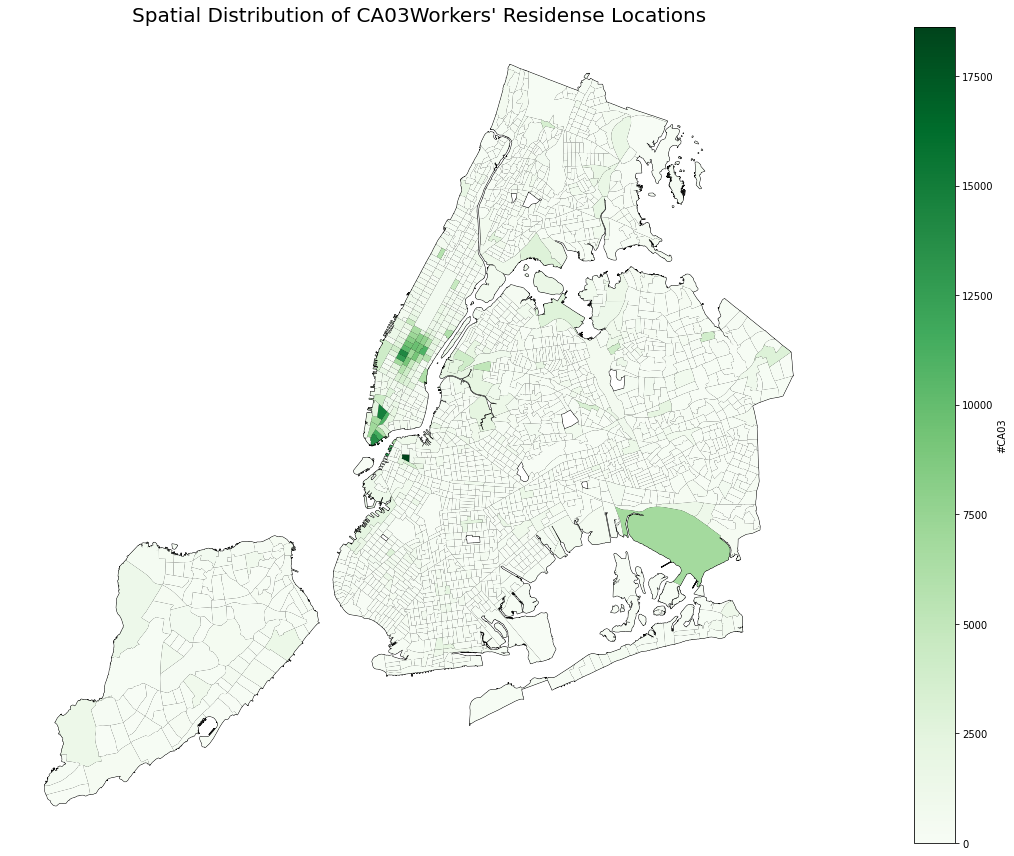

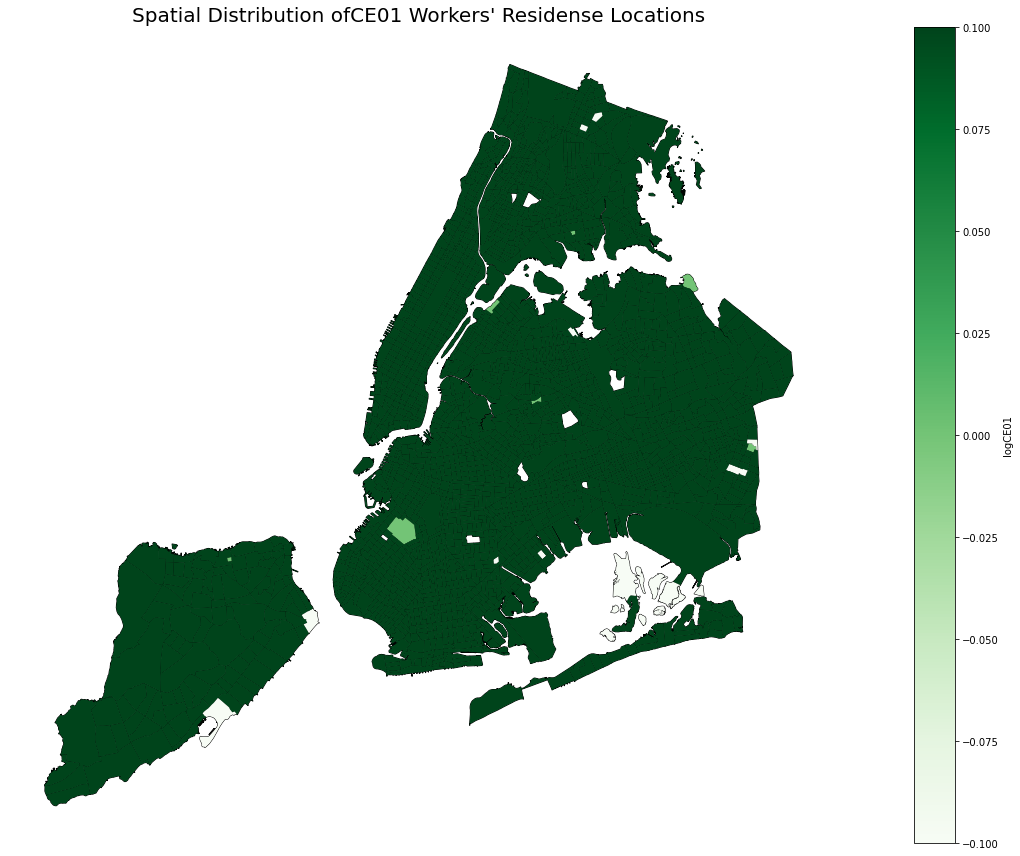

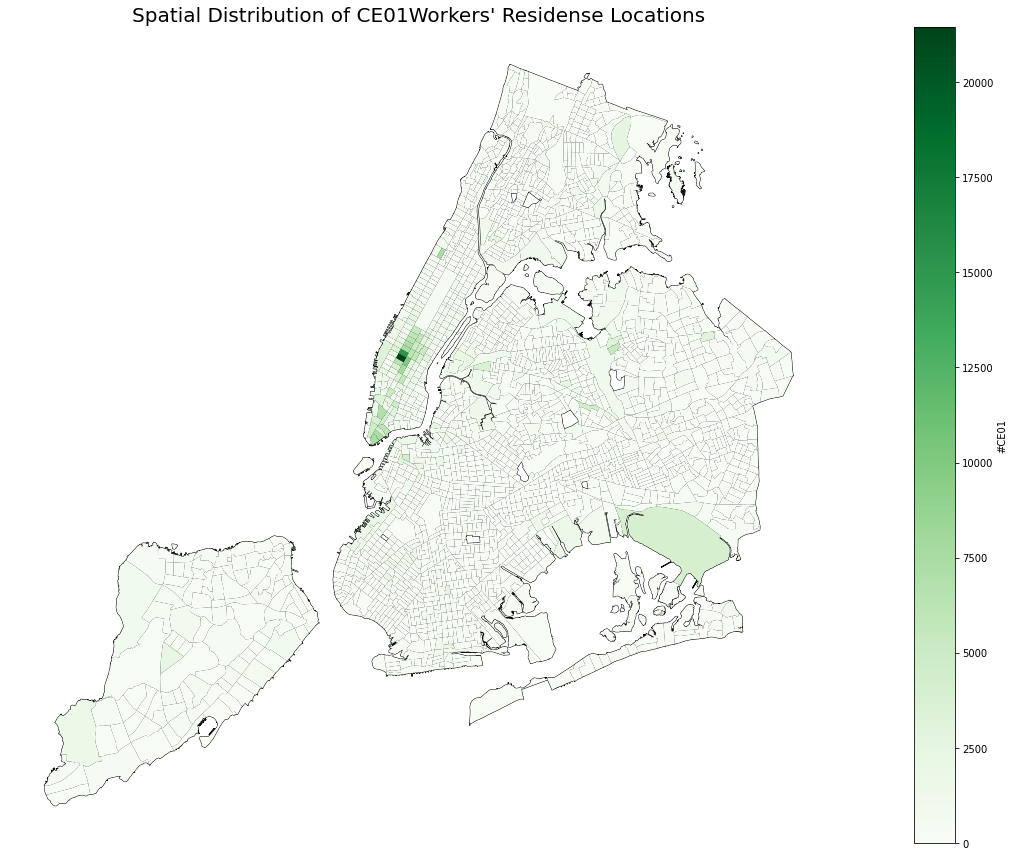

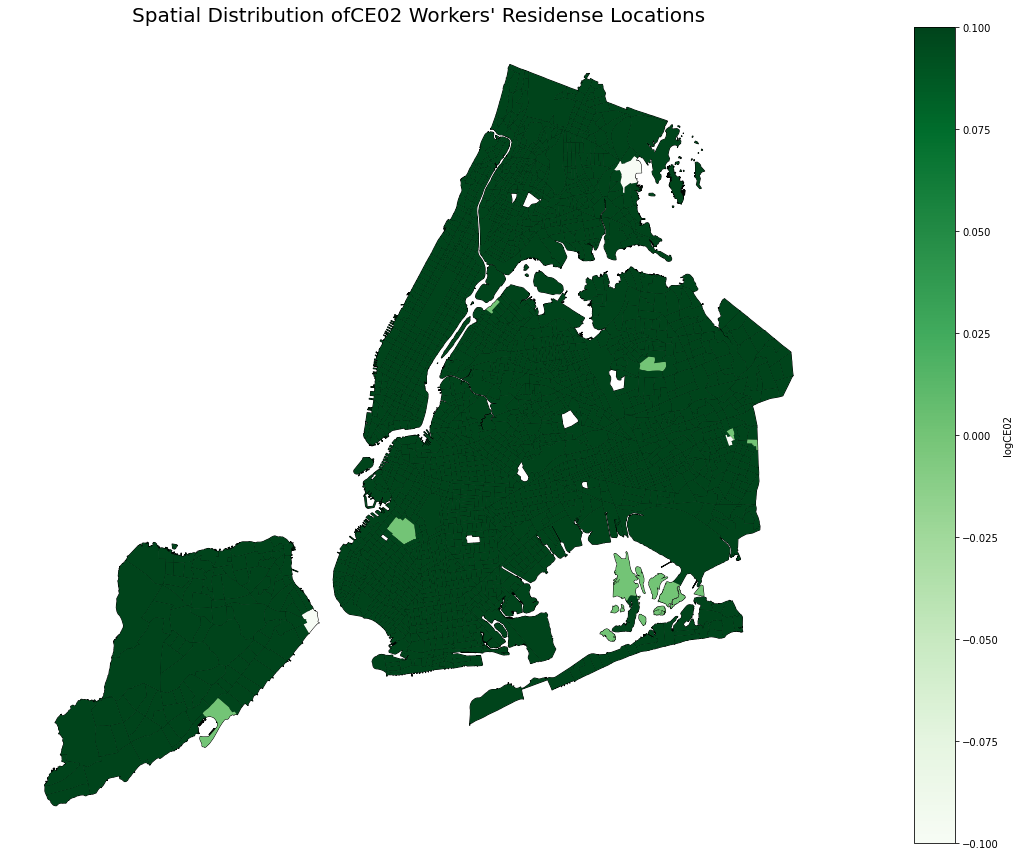

In [ ]:
## --------RESIDENCE AND WORKPLACE LOCATIONS HEATMAP FOR SUB-CATEGORIES---------
##------------------------------------------------------------------------------
for var in list(NYC_wac.columns[3:-1]):
  type(var)
  #log - workplace
  ax1 = NYC_dfw.plot(color='white', edgecolor='black', figsize=(30, 15) )
  NYC_dfw.plot(ax=ax1, column=np.log(NYC_dfw[var]), cmap='Greens', figsize=(30, 15)  )
  plt.title('Spatial Distribution of'+var+' Workers\' Residense Locations', fontsize=20)
  PCM=ax1.get_children()[1]
  plt.colorbar(PCM, label='log'+var)
  plt.axis('off')
  plt.savefig('./figures/subcategories/log_'+var+'Workplace_distribution.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
  #workplace
  ax2 = NYC_dfw.plot(color='white', edgecolor='black', figsize=(30, 15) )
  NYC_dfw.plot(ax=ax2, column=(NYC_dfw[var]), cmap='Greens', figsize=(30, 15)  )
  plt.title('Spatial Distribution of '+var+'Workers\' Residense Locations', fontsize=20)
  PCM=ax2.get_children()[1]
  plt.colorbar(PCM, label='#'+var)
  plt.axis('off')
  plt.savefig('./figures/subcategories/'+var+'Workplace_distribution.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
for var in list(NYC_rac.columns[3:-1]):
  #log - residence
  ax3 = NYC_dfr.plot(color='white', edgecolor='black', figsize=(30, 15) )
  NYC_dfr.plot(ax=ax3, column=np.log(NYC_dfr[var]), cmap='Greens', figsize=(30, 15)  )
  plt.title('Spatial Distribution of '+var+'Workers\' Residense Locations', fontsize=20)
  PCM=ax3.get_children()[1]
  plt.colorbar(PCM, label='log'+var)
  plt.axis('off')
  plt.savefig('./figures/subcategories/log'+var+'ResidencesDistribution.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
  #residence
  ax4 = NYC_dfr.plot(color='white', edgecolor='black', figsize=(30, 15) )
  NYC_dfr.plot(ax=ax4, column=(NYC_dfr[var]), cmap='Greens', figsize=(30, 15)  )
  plt.title('Spatial Distribution of'+var+' Workers\' Residense Locations', fontsize=20)
  PCM=ax4.get_children()[1]
  plt.colorbar(PCM, label='#'+var)
  plt.axis('off')
  plt.savefig('./figures/subcategories/'+var+'Residences_distribution.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)


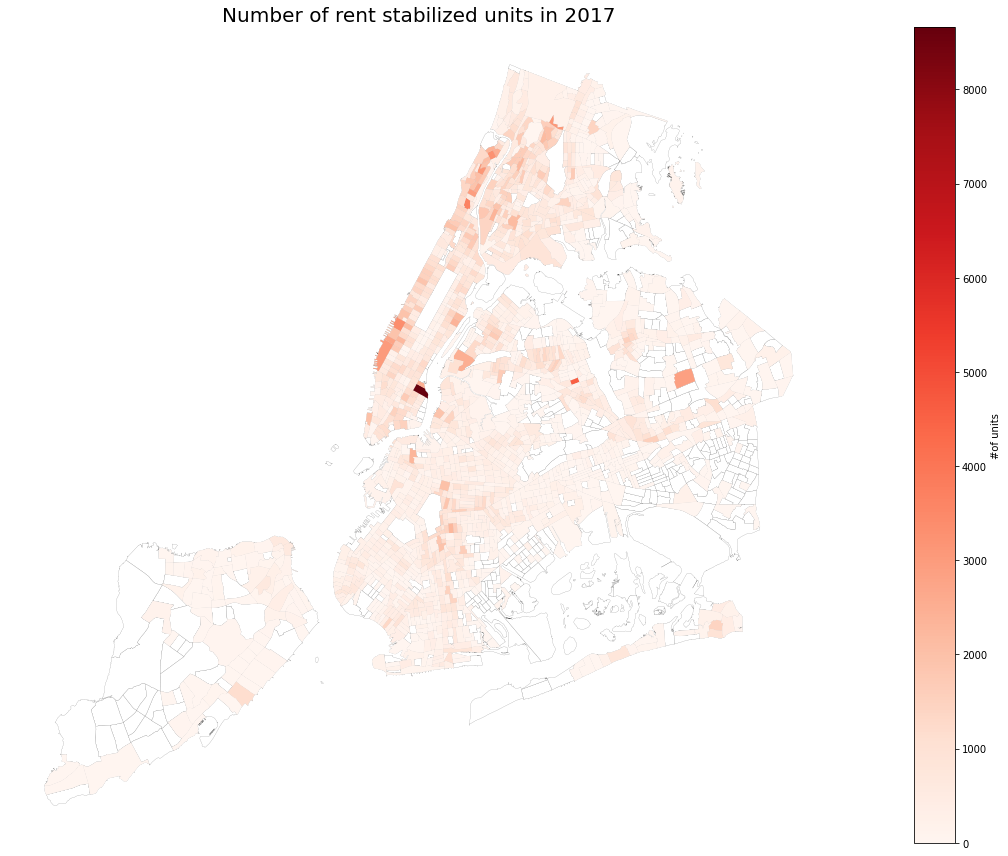

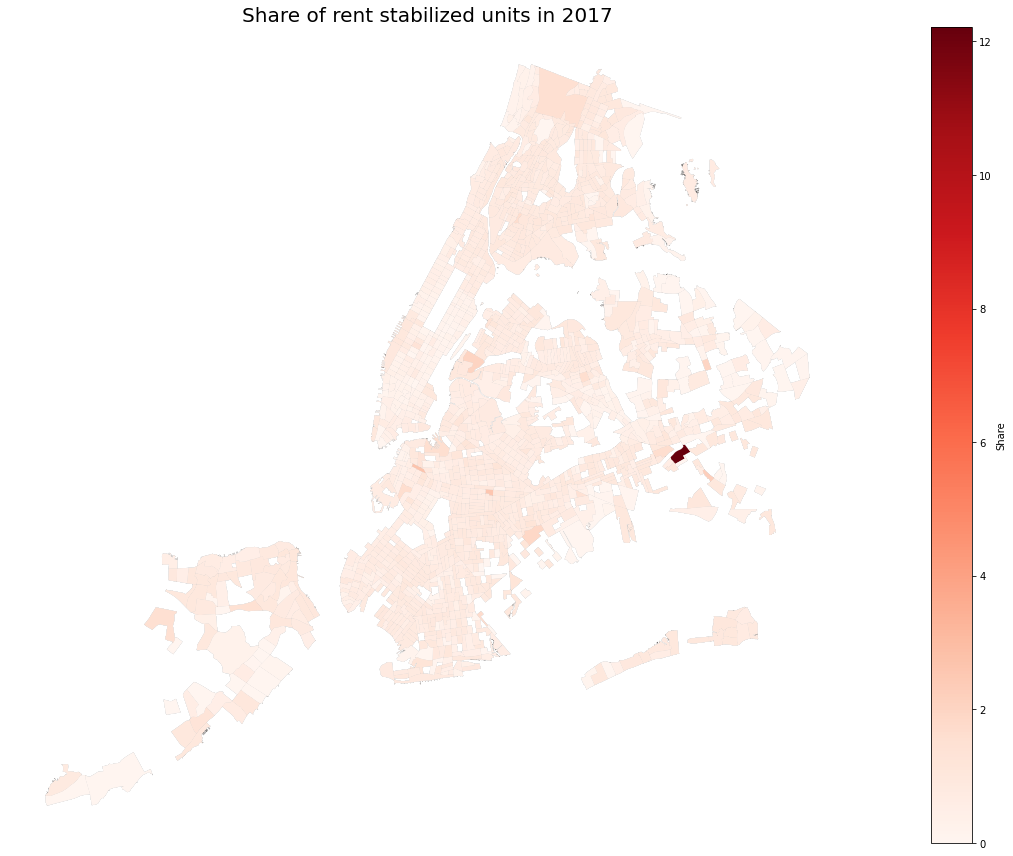

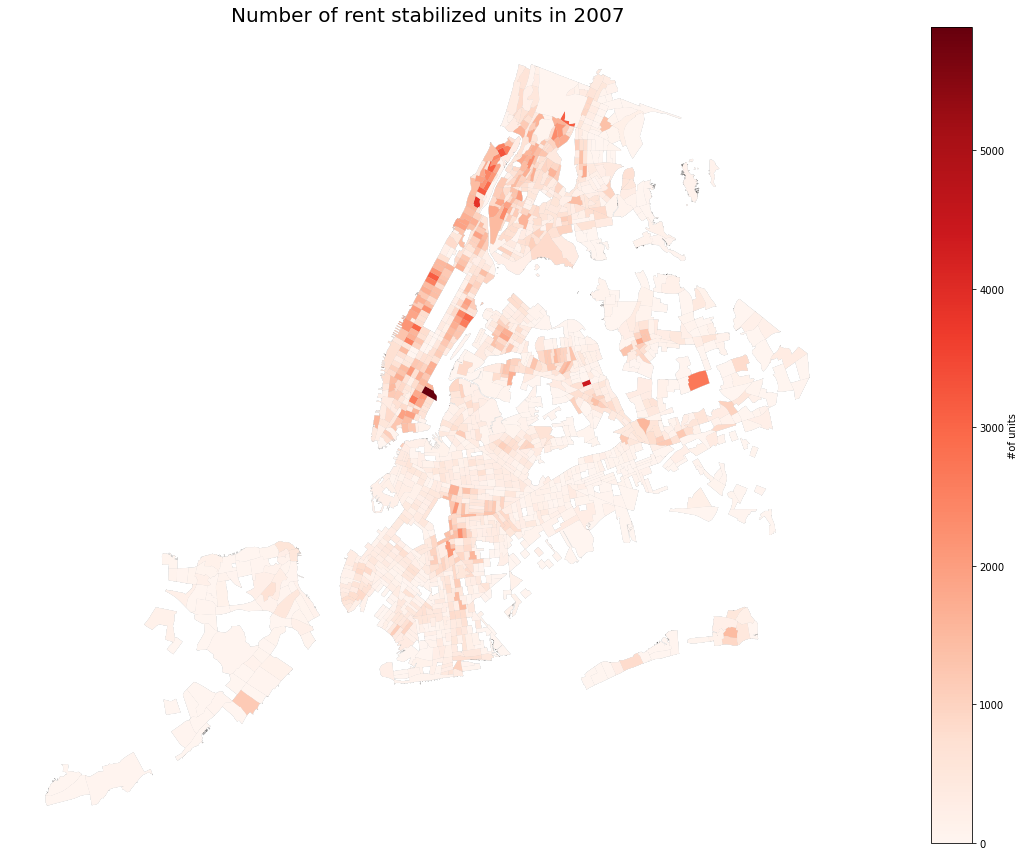

In [ ]:
## -------------------RENT STABILIZED UNITS' DENSITY HEATMAP--------------------
##------------------------------------------------------------------------------
NYC_dfrs = read_shapefile()

NYC_RS = pd.read_csv('./data/rent_stabilized_location.csv',header='infer')
NYC_RS['geoid'] = NYC_RS['lot_geocode']//10000

# collapse number of workers on tracts
NYC_RS['geoid'] = NYC_RS['geoid'].astype(int).astype(str)
NYC_RS = NYC_RS.groupby('geoid',as_index=False).sum()

# merge the shapefile map with rent stabilized units count data, at the tract level
NYC_dfrs = NYC_dfrs.merge(NYC_RS, how='outer', on= 'geoid')
NYC_dfrs['uc2017'].fillna(0)

#plot heatmap of rent stabilized units count
ax1 = NYC_dfrs.plot(color='white', edgecolor='black', figsize=(30, 15) , linewidth=0.1)
NYC_dfrs.plot(ax=ax1, column=NYC_dfrs['uc2017'], cmap='Reds', figsize=(30, 15))
plt.title('Number of rent stabilized units in 2017', fontsize=20)
PCM=ax1.get_children()[1]
plt.colorbar(PCM, label='#of units')
plt.axis('off')
plt.savefig('./figures/rent_stabilized_distribution_2017.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#plot heatmap of of rent stabilized units share
NYC_dfrs['uc2017_share'] = NYC_dfrs['uc2017']/NYC_dfrs['unitstotal']
NYC_dfrs = NYC_dfrs[NYC_dfrs['uc2017_share'].notna()]
NYC_dfrs = NYC_dfrs[NYC_dfrs['uc2017_share']<np.inf]
ax2 = NYC_dfrs.plot(color='white', edgecolor='black', figsize=(30, 15) , linewidth=0.1)
NYC_dfrs.plot(ax=ax2, column=NYC_dfrs['uc2017_share'], cmap='Reds', figsize=(30, 15))
plt.title('Share of rent stabilized units in 2017', fontsize=20)
PCM=ax2.get_children()[1]
plt.colorbar(PCM, label='Share')
plt.axis('off')
plt.savefig('./figures/Share_rent_stabilized_distribution_2017.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
plt.show()

#plot heatmap of rent stabilized units count in 2007
ax3 = NYC_dfrs.plot(color='white', edgecolor='black', figsize=(30, 15) , linewidth=0.1)
NYC_dfrs.plot(ax=ax3, column=NYC_dfrs['uc2007'], cmap='Reds', figsize=(30, 15))
plt.title('Number of rent stabilized units in 2007', fontsize=20)
PCM=ax3.get_children()[1]
plt.colorbar(PCM, label='#of units')
plt.axis('off')
plt.savefig('./figures/log_rent_stabilized_distribution_2007.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
plt.show()


In [ ]:
min(NYC_dfrs['uc2017_share'])

0.0

In [ ]:
## ------------------DECENNIAL CENSUS INFORMATION (POP & HU)--------------------
##------------------------------------------------------------------------------
NYC_dfall = read_shapefile()

NYC_census = pd.read_csv('./data/Nygeo2010_SF_short.csv',header='infer')
NYC_census = NYC_census[NYC_census['BLOCK'].notna()]
NYC_census['geoid'] = NYC_census['TRACT'].astype(int) + 1000000 * NYC_census['COUNTY'].astype(int) + 1000000000 * NYC_census['STATE'].astype(int)

# collapse population and total housing units on tracts
NYC_census['geoid'] = NYC_census['geoid'].astype(str)
NYC_census = NYC_census.groupby('geoid',as_index=False).sum()

# merge the shapefile map with rent stabilized units count data, at the tract level
NYC_dfall = NYC_dfall.merge(NYC_census, how='outer', on= 'geoid')



#plot heatmap of total population count
ax1 = NYC_dfall.plot(color='white', edgecolor='black', figsize=(30, 15) , linewidth=0.1)
NYC_dfall.plot(ax=ax1, column=NYC_dfall['POP100'], cmap='Reds', figsize=(30, 15))
plt.title('2010 Total Census Population Count', fontsize=20)
PCM=ax1.get_children()[1]
plt.colorbar(PCM, label='#of individuals')
plt.axis('off')
plt.savefig('./figures/population_2010.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
plt.show()


#plot heatmap of total number of housing unit count
ax2 = NYC_dfall.plot(color='white', edgecolor='black', figsize=(30, 15) , linewidth=0.1)
NYC_dfall.plot(ax=ax2, column=NYC_dfall['HU100'], cmap='Reds', figsize=(30, 15))
plt.title('2010 Total housing units Count', fontsize=20)
PCM=ax2.get_children()[1]
plt.colorbar(PCM, label='#of units')
plt.axis('off')
plt.savefig('./figures/housing_units_2010.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
plt.show()


#plot heatmap of share of rent stabilized housing units
ax3 = NYC_dfall.plot(color='white', edgecolor='black', figsize=(30, 15) , linewidth=0.1)
NYC_dfall['RS_share'] = NYC_dfrs['uc2017']/NYC_dfall['HU100']
NYC_dfall = NYC_dfall[NYC_dfall['RS_share'].notna()]
#NYC_dfall = NYC_dfall[NYC_dfall['RS_share']<=1]
NYC_dfall.plot(ax=ax3, column=NYC_dfall['RS_share'], cmap='Reds', figsize=(30, 15))
plt.title('2010 Share of Rent Stabilized Units', fontsize=20)
PCM=ax3.get_children()[1]
plt.colorbar(PCM, label='share rent stabilized')
plt.axis('off')
plt.savefig('./figures/RS_share.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
plt.show()


#plot heatmap of average number of people living in each housing unit (pop/HU)
ax4 = NYC_dfall.plot(color='white', edgecolor='black', figsize=(30, 15) , linewidth=0.1)
NYC_dfall['pop_per_HU'] = NYC_dfall['POP100']/NYC_dfall['HU100']
NYC_dfall = NYC_dfall[NYC_dfall['pop_per_HU'].notna()]
#NYC_dfall = NYC_dfall[NYC_dfall['pop_per_HU']<np.inf]
NYC_dfall.plot(ax=ax4, column=NYC_dfall['pop_per_HU'], cmap='Reds', figsize=(30, 15))
plt.title('2010 Average Household Size', fontsize=20)
PCM=ax4.get_children()[1]
plt.colorbar(PCM, label='#of persons')
plt.axis('off')
plt.savefig('./figures/pop_per_HU_2010.pdf', dpi=1200, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [ ]:

NYC_dfrs

CTLabel  BoroCode       BoroName  ...      lot_lat building_id   lot_geocode
0          9       5.0  Staten Island  ...   121.926800    384380.0  1.082550e+15
1         98       1.0      Manhattan  ...  4116.311137  12055173.0  3.642162e+16
2        100       1.0      Manhattan  ...   896.698003   2677881.0  7.933422e+15
3        102       1.0      Manhattan  ...    40.758999    121948.0  3.606101e+14
4        104       1.0      Manhattan  ...   978.301998   2952071.0  8.654642e+15
...      ...       ...            ...  ...          ...         ...           ...
2171     NaN       NaN            NaN  ...   367.586502   1111061.0  3.245852e+15
2172     NaN       NaN            NaN  ...   122.082198    408768.0  1.082130e+15
2173     NaN       NaN            NaN  ...   285.035904    771791.0  2.528330e+15
2174     NaN       NaN            NaN  ...   163.312398    476878.0  1.444760e+15
2175     NaN       NaN            NaN  ...   122.324897    402219.0  1.083570e+15

[2176 rows x 49 columns]